<a href="https://colab.research.google.com/github/HenryMorganDibie/BigCats-Image-Classification/blob/main/BigCats_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Dataset and Description

In [ ]:
!unzip 'drive/MyDrive/Big Cats Image Classification/archive (18).zip' -d 'drive/MyDrive/Big Cats Image Classification/'

Archive:  drive/MyDrive/Big Cats Image Classification/archive (18).zip
replace drive/MyDrive/Big Cats Image Classification/EfficientNetB0-10-(224 X 224)-100.00.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: drive/MyDrive/Big Cats Image Classification/EfficientNetB0-10-(224 X 224)-100.00.h5  
  inflating: drive/MyDrive/Big Cats Image Classification/MobileNetV3 small-10-(224 X 224)-95.96.h5  
  inflating: drive/MyDrive/Big Cats Image Classification/WILDCATS.CSV  
  inflating: drive/MyDrive/Big Cats Image Classification/test/AFRICAN LEOPARD/1.jpg  
  inflating: drive/MyDrive/Big Cats Image Classification/test/AFRICAN LEOPARD/2.jpg  
  inflating: drive/MyDrive/Big Cats Image Classification/test/AFRICAN LEOPARD/3.jpg  
  inflating: drive/MyDrive/Big Cats Image Classification/test/AFRICAN LEOPARD/4.jpg  
  inflating: drive/MyDrive/Big Cats Image Classification/test/AFRICAN LEOPARD/5.jpg  
  inflating: drive/MyDrive/Big Cats Image Classification/test/CARACAL/1.jpg  
  inflating: dri

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Wildcats = pd.read_csv('drive/MyDrive/Big Cats Image Classification/WILDCATS.CSV')
Wildcats

,class id,filepaths,labels,data set,scientific name
0,0,train/AFRICAN LEOPARD/001.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus
1,0,train/AFRICAN LEOPARD/002.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus
2,0,train/AFRICAN LEOPARD/003.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus
3,0,train/AFRICAN LEOPARD/004.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus
4,0,train/AFRICAN LEOPARD/005.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus
...,...,...,...,...,...
2434,9,valid/TIGER/1.jpg,TIGER,valid,Panthera tigris
2435,9,valid/TIGER/2.jpg,TIGER,valid,Panthera tigris
2436,9,valid/TIGER/3.jpg,TIGER,valid,Panthera tigris
2437,9,valid/TIGER/4.jpg,TIGER,valid,Panthera tigris


Explanatory Data Analysis Of Big Cats Image Classification

(2439, 5)
class id           0
filepaths          0
labels             0
data set           0
scientific name    0
dtype: int64
['Panthera pardus pardus' 'Caracal caracal' 'Acinonyx jubatus'
 'Neofelis nebulosa' ' Panthera onca' 'Panthera leo' 'Leopardus pardali'
 'Puma concolor' 'Panthera uncia' 'Panthera tigris']


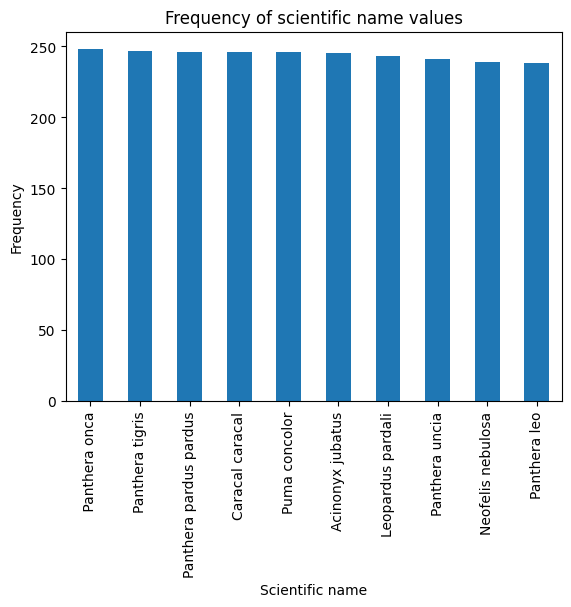

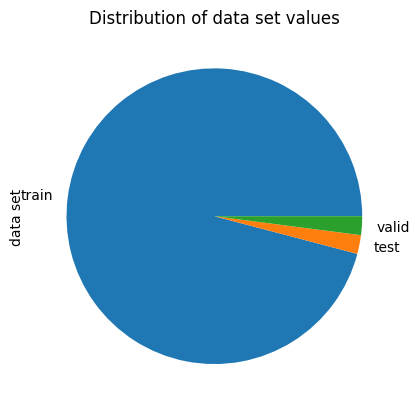

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Print the shape of the DataFrame
print(Wildcats.shape)

# Check for missing values
print(Wildcats.isnull().sum())

# Get unique values of the 'scientific name' column
print(Wildcats['scientific name'].unique())

# Plot a bar chart of the frequency of each 'scientific name' value
Wildcats['scientific name'].value_counts().plot(kind='bar')
plt.title('Frequency of scientific name values')
plt.xlabel('Scientific name')
plt.ylabel('Frequency')
plt.show()

# Plot a pie chart of the distribution of 'data set' values
Wildcats['data set'].value_counts().plot(kind='pie')
plt.title('Distribution of data set values')
plt.show()

In [ ]:
Wildcats['labels'].value_counts().median()

245.5

In [ ]:
train = 'drive/MyDrive/Big Cats Image Classification/train'
train

'drive/MyDrive/Big Cats Image Classification/train'

In [ ]:
test = 'drive/MyDrive/Big Cats Image Classification/test'

In [ ]:
validation = 'drive/MyDrive/Big Cats Image Classification/valid'

Training Model using convolutional neural network and later got a better performance using MobileNetV2 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and preprocess the dataset
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Define the neural network architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the neural network
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size)

# Evaluate the neural network
test_loss, test_acc = model.evaluate_generator(test_generator, steps=test_generator.n // test_generator.batch_size)
print('Test accuracy:', test_acc)


Found 2339 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


<ipython-input-9-3c382f6e8e23>:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
73/73 [==============================] - 373s 5s/step - loss: 2.1713 - accuracy: 0.1612 - val_loss: 1.8027 - val_accuracy: 0.3750
Epoch 2/10
73/73 [==============================] - 355s 5s/step - loss: 1.7400 - accuracy: 0.3411 - val_loss: 2.0009 - val_accuracy: 0.3438
Epoch 3/10
73/73 [==============================] - 348s 5s/step - loss: 1.4759 - accuracy: 0.4456 - val_loss: 1.3092 - val_accuracy: 0.4062
Epoch 4/10
73/73 [==============================] - 351s 5s/step - loss: 1.3588 - accuracy: 0.4833 - val_loss: 1.3068 - val_accuracy: 0.5000
Epoch 5/10
73/73 [==============================] - 346s 5s/step - loss: 1.2378 - accuracy: 0.5466 - val_loss: 1.4368 - val_accuracy: 0.5312
Epoch 6/10
73/73 [==============================] - 352s 5s/step - loss: 1.1655 - accuracy: 0.5661 - val_loss: 1.2252 - val_accuracy: 0.3750
Epoch 7/10
73/73 [==============================] - 345s 5s/step - loss: 0.9546 - accuracy: 0.6441 - val_loss: 0.9281 - val_accuracy: 0.6250
Epoch 8/10
73

<ipython-input-9-3c382f6e8e23>:59: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=test_generator.n // test_generator.batch_size)


Test accuracy: 0.625


In [ ]:
print("Test accuracy: {:.2%}".format(test_acc))

Test accuracy: 96.00%


Using Transfer learning to improve the accuracy of my image classification model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# set up the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# add a new top layer for our own classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# create a new model for our own classification task
model = Model(inputs=base_model.input, outputs=predictions)

# freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

# evaluate the model on the test data
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


Found 2339 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


Epoch 1/10
74/74 [==============================] - 143s 2s/step - loss: 0.6512 - accuracy: 0.7888 - val_loss: 0.2693 - val_accuracy: 0.9400
Epoch 2/10
74/74 [==============================] - 130s 2s/step - loss: 0.3246 - accuracy: 0.8957 - val_loss: 0.1948 - val_accuracy: 0.9200
Epoch 3/10
74/74 [==============================] - 129s 2s/step - loss: 0.2406 - accuracy: 0.9209 - val_loss: 0.1746 - val_accuracy: 0.9600
Epoch 4/10
74/74 [==============================] - 132s 2s/step - loss: 0.2032 - accuracy: 0.9337 - val_loss: 0.2418 - val_accuracy: 0.9200
Epoch 5/10
74/74 [==============================] - 129s 2s/step - loss: 0.2396 - accuracy: 0.9201 - val_loss: 0.2005 - val_accuracy: 0.9600
Epoch 6/10
74/74 [==============================] - 130s 2s/step - loss: 0.2251 - accuracy: 0.9239 - val_loss: 0.2512 - val_accuracy: 0.9400
Epoch 7/10
74/74 [==============================] - 134s 2s/step - loss: 0.1624 - accuracy: 0.9393 - val_loss: 0.2760 - val_accuracy: 0.9200
Epoch 8/10
74

In [ ]:
print("Test accuracy: {:.2%}".format(test_acc))

Test accuracy: 96.00%
